In [1]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 

In [2]:
data = np.zeros((190,2),dtype=np.float32)

k = 0
with open("./birth_life_2010.txt") as f:
    line = f.readlines()

for i in range(1, len(line)):
    splitted_str = line[i].split("\t")
    data[i-1,0] = float(splitted_str[1])
    data[i-1,1] = float(splitted_str[2])

In [39]:
x = tf.placeholder(dtype=tf.float32, shape=None, name = "x")
y = tf.placeholder(dtype=tf.float32, shape=None, name = "y")

w = tf.Variable(tf.truncated_normal([1],dtype=tf.float32))
b = tf.Variable(tf.truncated_normal([1],dtype=tf.float32))

y_predicted = w*x + b


def huber_loss(labels, predictions, delta = 14.0):   
    residual = tf.abs(labels - predictions)
    def f1():
        return 0.5*tf.square(residual)
    def f2():
        return delta*residual - 0.5*tf.square(delta)
    return tf.cond(tf.reshape(residual, []) < delta, f1, f2)


loss_huber = huber_loss(y, y_predicted)

loss_square = tf.square(y - y_predicted, name="loss")


train_op = tf.train.GradientDescentOptimizer(0.001).minimize(loss_huber)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run([w, b]))
    
    for epoch in range(50):
        for intensor,label in data:
            #print("intensor is ", type(intensor), "  label is ", type(label))
            sess.run(train_op,feed_dict={x:intensor, y:label})
        
    w_out, b_out = sess.run([w,b])
    print( w_out, b_out)



[array([-0.34983352], dtype=float32), array([ 0.67558634], dtype=float32)]
[ 3.39392805] [ 51.45986557]


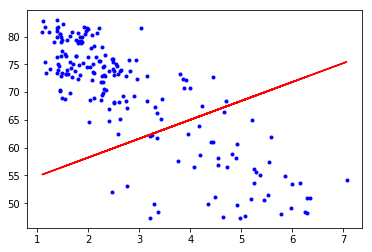

In [40]:
y_prime = w_out*data[:,0] + b_out
plt.plot(data[:, 0], data[:, 1],"b.", data[:,0],y_prime,"r-")
plt.show()

In [37]:
dataset = tf.data.Dataset.from_tensor_slices(data)
iterator = dataset.make_one_shot_iterator()
instance = iterator.get_next()
with tf.Session() as sess:
    for i in range(200):
        print(sess.run(instance))


[  1.82200003  74.82824707]
[  3.86899996  70.81948853]
[  3.91100001  72.15065765]
[  5.57800007  61.99985504]
[  1.579       73.92765808]
[  4.22900009  67.4651947 ]
[  1.14999998  81.64146423]
[  3.8599999   72.30638885]
[  3.14199996  68.48431396]
[  3.95099998  62.44060898]
[  2.16000009  80.70243835]
[  2.14100003  76.30168152]
[  2.00200009  64.66209412]
[  2.50399995  68.19497681]
[  3.45099998  68.76483154]
[  2.63499999  74.02455902]
[  1.09200001  80.77531433]
[  2.74699998  67.06400299]
[  1.22000003  80.76194763]
[  1.38999999  82.93268585]
[  2.1170001   68.88965607]
[  1.10800004  82.87805176]
[  2.47000003  75.99427032]
[  2.08999991  75.07688141]
[  2.66799998  69.22583008]
[  2.02200007  68.53214264]
[  1.59800005  73.27309418]
[  2.58100009  62.53622055]
[  2.04200006  77.93202209]
[  1.91999996  81.69512177]
[  2.49900007  68.00099945]
[  1.94000006  80.4024353 ]
[  1.44500005  70.27561188]
[  2.39899993  64.86351013]
[  2.08800006  73.69665527]
[  3.29699993  67.25

OutOfRangeError: End of sequence
	 [[Node: IteratorGetNext_1 = IteratorGetNext[output_shapes=[[2]], output_types=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](OneShotIterator_1)]]

Caused by op 'IteratorGetNext_1', defined at:
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-ae6546cb1680>", line 3, in <module>
    instance = iterator.get_next()
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\data\ops\iterator_ops.py", line 370, in get_next
    name=name)), self._output_types,
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\ops\gen_dataset_ops.py", line 1465, in iterator_get_next
    output_shapes=output_shapes, name=name)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "G:\Anaconda\installCatalog\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

OutOfRangeError (see above for traceback): End of sequence
	 [[Node: IteratorGetNext_1 = IteratorGetNext[output_shapes=[[2]], output_types=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](OneShotIterator_1)]]


## 定义一个huber loss function

In [38]:
i

190